# Evaluating models

In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray.plot as xplt
import cftime

In [6]:
import torch
import os, sys
dir2 = os.path.abspath('../../unet/unet')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
import unet

In [7]:
import pysteps

In [23]:
hi_res_data = xr.open_mfdataset("../../../../derived_data/2.2km-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0, time=slice(720))
lo_res_data = xr.open_mfdataset("../../../../derived_data/60km-2.2km-regrid-lin-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0, time=slice(720))

In [9]:
model = torch.load('../../checkpoints/3801893.bp1/model-epoch1999.pth', map_location=torch.device('cpu'))

In [24]:
from torch.utils.data import DataLoader, TensorDataset

test_set = TensorDataset(torch.stack([torch.tensor(lo_res_data.pr.values)], dim=1))
test_dl = DataLoader(test_set, batch_size=64)

pred = np.concatenate([model(batch[0]).squeeze().detach().numpy() for batch in test_dl])
    
hi_res_data['pred_pr'] = xr.DataArray(pred, dims=["time", "grid_longitude", "grid_latitude"])

(array([580.,  74.,  33.,  15.,  10.,   4.,   3.,   0.,   0.,   1.]),
 array([-5.40702438e+01,  1.21364121e+04,  2.43268945e+04,  3.65173750e+04,
         4.87078594e+04,  6.08983398e+04,  7.30888203e+04,  8.52793047e+04,
         9.74697891e+04,  1.09660266e+05,  1.21850750e+05], dtype=float32),
 <BarContainer object of 10 artists>)

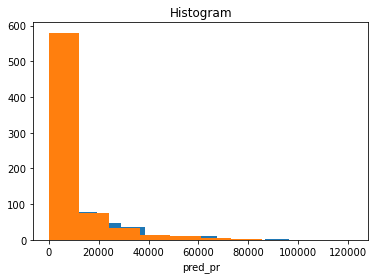

In [25]:
hi_res_data.sum(dim=["grid_longitude", "grid_latitude"]).pr.plot.hist()
hi_res_data.sum(dim=["grid_longitude", "grid_latitude"]).pred_pr.plot.hist()

In [18]:
lo_res_data.pr

<xarray.DataArray 'pr' (time: 21600, grid_latitude: 60, grid_longitude: 60)>
dask.array<getitem, shape=(21600, 60, 60), dtype=float32, chunksize=(360, 60, 60), chunktype=numpy.ndarray>
Coordinates:
    ensemble_member     int32 1
  * time                (time) object 1980-12-01 12:00:00 ... 2080-11-30 12:0...
  * grid_latitude       (grid_latitude) float64 -1.58 -1.56 ... -0.42 -0.3999
  * grid_longitude      (grid_longitude) float64 360.9 360.9 ... 362.1 362.1
    ensemble_member_id  |S27 dask.array<chunksize=(), meta=np.ndarray>
    month_number        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    yyyymmdd            (time) |S64 dask.array<chunksize=(360,), meta=np.ndarray>
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      Precipitation rate
    units:          mm/day
    cell_methods:   time: mean
    grid_mapping:   rotated_latitude_longitude

In [17]:
hi_res_data.pr

<xarray.DataArray 'pr' (time: 21600, grid_latitude: 60, grid_longitude: 60)>
dask.array<getitem, shape=(21600, 60, 60), dtype=float32, chunksize=(360, 60, 60), chunktype=numpy.ndarray>
Coordinates:
  * grid_latitude       (grid_latitude) float64 -1.58 -1.56 ... -0.42 -0.3999
  * grid_longitude      (grid_longitude) float64 360.9 360.9 ... 362.1 362.1
  * time                (time) object 1980-12-01 12:00:00 ... 2080-11-30 12:0...
    ensemble_member     int32 1
    ensemble_member_id  |S27 dask.array<chunksize=(), meta=np.ndarray>
    latitude            (grid_latitude, grid_longitude) float64 dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (grid_latitude, grid_longitude) float64 dask.array<chunksize=(60, 60), meta=np.ndarray>
    month_number        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    yyyymmdd            (time) |S64 dask.array<chunksize=(360,), meta=np.ndarray>
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      Precipitation rate
    units:          mm/day
    description:    Precipitation rate
    label_units:    mm/day
    plot_label:     Precipitation rate (mm/day)
    cell_methods:   time: mean
    grid_mapping:   rotated_latitude_longitude

In [19]:
hi_res_data.pred_pr

<xarray.DataArray 'pred_pr' (time: 21600, grid_longitude: 60, grid_latitude: 60)>
array([[[ 3.14722508e-02,  1.92582935e-01,  5.02544880e-01, ...,
          9.87524700e+00,  8.20520496e+00,  7.77788353e+00],
        [ 1.43409505e-01,  3.09122115e-01,  6.67653501e-01, ...,
          9.78785610e+00,  8.50467396e+00,  9.10742664e+00],
        [ 9.96979326e-02,  1.42174929e-01,  1.70443237e-01, ...,
          1.41352949e+01,  1.04398546e+01,  9.40877819e+00],
        ...,
        [-2.03651693e-02,  3.10582630e-02,  1.20977290e-01, ...,
          4.62465912e-01,  2.08922699e-01,  1.88735768e-01],
        [ 9.83127579e-03,  7.19406903e-02,  7.00067952e-02, ...,
          8.82740498e-01,  2.15624467e-01,  7.50687420e-02],
        [ 1.64722204e-02,  1.89696774e-02, -4.25015055e-02, ...,
          9.61699963e-01,  6.34277642e-01,  4.67094243e-01]],

       [[ 7.92951956e-02,  1.82994083e-01,  2.19015300e-01, ...,
          4.98130798e+00,  5.61496544e+00,  3.71613097e+00],
        [ 6.42543137e-02,  1.82958785e-02,  6.73007667e-02, ...,
          2.18139887e+00,  4.33579683e+00,  4.00945234e+00],
        [ 6.85852915e-02,  3.55541147e-02,  6.97696581e-02, ...,
          7.84235120e-01,  1.14931774e+00,  1.59856153e+00],
...
          5.89188147e+00,  5.92922831e+00,  6.26136780e+00],
        [ 1.11646068e+00,  1.11487353e+00,  1.15685034e+00, ...,
          8.33288574e+00,  8.19984818e+00,  8.20325661e+00],
        [ 1.02726328e+00,  1.10469627e+00,  1.27232730e+00, ...,
          1.04946814e+01,  1.04044800e+01,  9.46328831e+00]],

       [[-3.90443392e-02,  1.19060548e-02,  2.75126230e-02, ...,
          2.25768638e+00,  1.42589140e+00,  7.31217325e-01],
        [-1.30697107e-02, -8.35601054e-03, -1.95438135e-02, ...,
          2.30916500e+00,  1.41445053e+00,  6.82847977e-01],
        [ 3.29430364e-02,  7.06227077e-03,  4.43335511e-02, ...,
          1.81875479e+00,  1.34680736e+00,  7.31861830e-01],
        ...,
        [ 2.97744036e+00,  2.51216269e+00,  1.51612461e+00, ...,
          5.44058904e-02,  3.07268575e-02,  1.88307911e-02],
        [ 2.11349535e+00,  2.34483600e+00,  2.86244869e+00, ...,
          3.77164893e-02,  1.66894402e-02,  1.71755478e-02],
        [ 1.19533205e+00,  1.11831295e+00,  2.90907502e-01, ...,
          2.65628528e-02,  2.55570859e-02,  2.46770680e-03]]],
      dtype=float32)
Coordinates:
  * grid_latitude       (grid_latitude) float64 -1.58 -1.56 ... -0.42 -0.3999
  * grid_longitude      (grid_longitude) float64 360.9 360.9 ... 362.1 362.1
  * time                (time) object 1980-12-01 12:00:00 ... 2080-11-30 12:0...
    ensemble_member     int32 1
    ensemble_member_id  |S27 dask.array<chunksize=(), meta=np.ndarray>
    latitude            (grid_latitude, grid_longitude) float64 dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (grid_latitude, grid_longitude) float64 dask.array<chunksize=(60, 60), meta=np.ndarray>
    month_number        (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    year                (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    yyyymmdd            (time) |S64 dask.array<chunksize=(360,), meta=np.ndarray>

In [22]:
hi_res_data.sum(dim=["grid_longitude", "grid_latitude"]).pr.max().values

array(193155.4, dtype=float32)

In [21]:
hi_res_data.sum(dim=["grid_longitude", "grid_latitude"]).pred_pr.max()

<xarray.DataArray 'pred_pr' ()>
array(43776.671875)
Coordinates:
    ensemble_member     int32 1
    ensemble_member_id  |S27 dask.array<chunksize=(), meta=np.ndarray>